# Vis all of the scores with means

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'SIM'

In [4]:
df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

In [5]:
df

,all,person,no person,animal,sports,electronic
aim,0.394616,0.364064,0.451696,0.335876,0.323169,0.396621
cas,0.495140,0.472677,0.537109,0.430710,0.476040,0.478320
covsal,0.502877,0.487883,0.530890,0.486593,0.474478,0.483885
gbvs,0.542515,0.512920,0.597809,0.487240,0.499293,0.534094
icf,0.519075,0.498890,0.556787,0.457074,0.483482,0.505949
ik,0.445675,0.426353,0.481492,0.396768,0.413913,0.446081
sun,0.419288,0.387883,0.477965,0.346989,0.346531,0.419481
dg,0.650369,0.639309,0.671034,0.631222,0.641099,0.633137


In [6]:
df = df.transpose()[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()
df

,all,person,no person,animal,sports,electronic
aim,0.394616,0.364064,0.451696,0.335876,0.323169,0.396621
cas,0.495140,0.472677,0.537109,0.430710,0.476040,0.478320
covsal,0.502877,0.487883,0.530890,0.486593,0.474478,0.483885
gbvs,0.542515,0.512920,0.597809,0.487240,0.499293,0.534094
icf,0.519075,0.498890,0.556787,0.457074,0.483482,0.505949
ik,0.445675,0.426353,0.481492,0.396768,0.413913,0.446081
sun,0.419288,0.387883,0.477965,0.346989,0.346531,0.419481


### Calculate means

In [7]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [8]:
df = calc_means(df)
df_f03 = calc_means(df_f03)
df_f05 = calc_means(df_f05)
df_f07 = calc_means(df_f07)

In [9]:
def drop_means(df):
    df0 = df.drop('mean model')
    df0 = df0.drop('mean context', axis=1)
    return df0

In [10]:
df0 = drop_means(df)
df0_f03 = drop_means(df_f03)
df0_f05 = drop_means(df_f05)
df0_f07 = drop_means(df_f07)


In [11]:
df0_f07

,all,person,no person,animal,sports,electronic
aim,0.401552,0.374624,0.451864,0.338444,0.327447,0.406648
cas,0.508505,0.493141,0.537210,0.435842,0.484921,0.498240
covsal,0.523280,0.519233,0.530842,0.495003,0.489361,0.514306
gbvs,0.555403,0.532713,0.597796,0.492372,0.508165,0.553327
icf,0.532480,0.519504,0.556726,0.461936,0.493354,0.526419
ik,0.465300,0.456548,0.481563,0.404780,0.426578,0.474942
sun,0.437632,0.416026,0.477998,0.354048,0.358206,0.447081


In [12]:
df0_mean_context = df.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context_f03 = df_f03.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context_f05 = df_f05.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context_f07 = df_f07.transpose().loc[['mean context']].transpose().drop('mean model')
df0_mean_context

,mean context
aim,0.377674
cas,0.481666
covsal,0.494434
gbvs,0.528978
icf,0.503543
ik,0.435047
sun,0.399689


In [13]:
df0_mean_model = df.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model_f03 = df_f03.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model_f05 = df_f05.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model_f07 = df_f07.loc[['mean model']].transpose().drop('mean context').transpose()
df0_mean_model

,all,person,no person,animal,sports,electronic
mean model,0.474169,0.450096,0.519107,0.420179,0.430987,0.466347


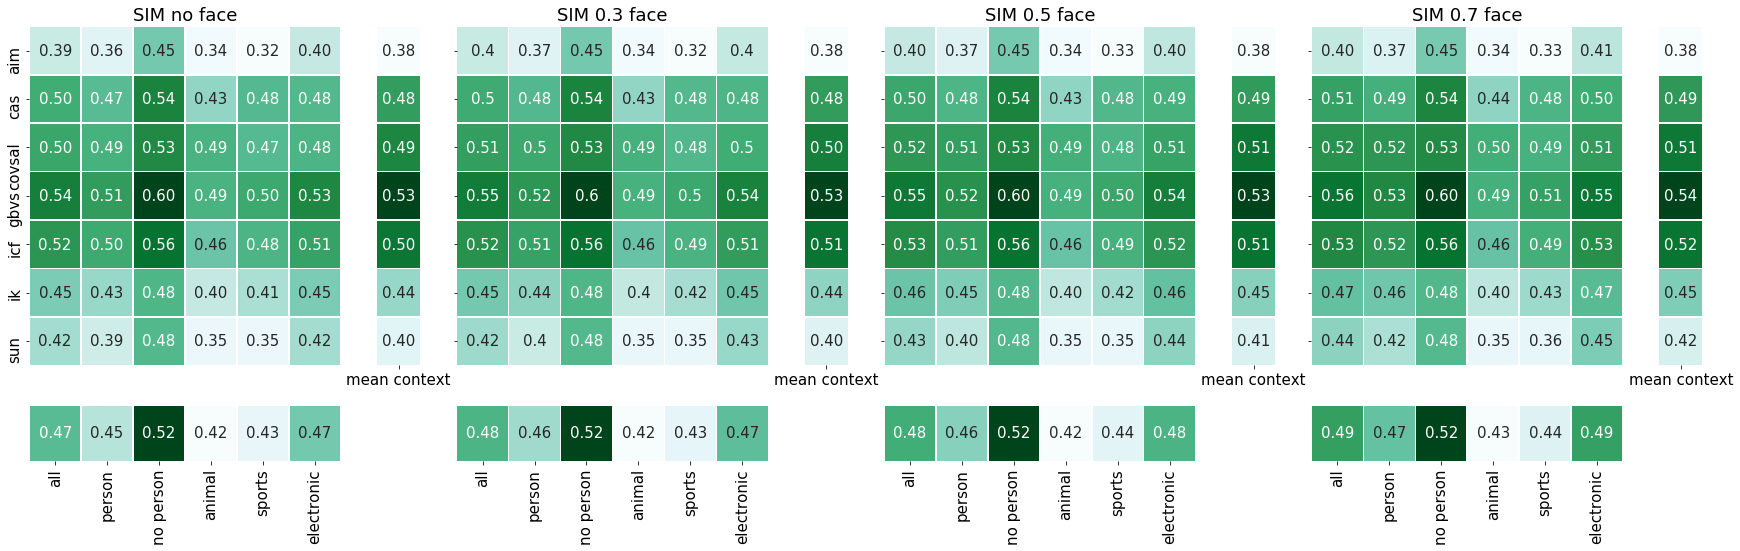

In [14]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(df0, annot=True, linewidths=.5, ax=ax01, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model, annot=True, linewidths=.5, ax=ax03, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context, annot=True, linewidths=.5, ax=ax02, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f03, annot=True, linewidths=.5, ax=ax11, cmap='BuGn', cbar=False, xticklabels='');
sns.heatmap(df0_mean_model_f03, annot=True, linewidths=.5, ax=ax13, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f03, annot=True, linewidths=.5, ax=ax12, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f05, annot=True, linewidths=.5, ax=ax21, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f05, annot=True, linewidths=.5, ax=ax23, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f05, annot=True, linewidths=.5, ax=ax22, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f07, annot=True, linewidths=.5, ax=ax31, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f07, annot=True, linewidths=.5, ax=ax33, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f07, annot=True, linewidths=.5, ax=ax32, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('{} no face'.format(metric));
ax11.set_title('{} 0.3 face'.format(metric));
ax21.set_title('{} 0.5 face'.format(metric));
ax31.set_title('{} 0.7 face'.format(metric));
plt.savefig('../plots/'+'{}_sep_with_mean.jpg'.format(metric), bbox_inches='tight', pad_inches=0)

In [15]:
df0

,all,person,no person,animal,sports,electronic
aim,0.394616,0.364064,0.451696,0.335876,0.323169,0.396621
cas,0.495140,0.472677,0.537109,0.430710,0.476040,0.478320
covsal,0.502877,0.487883,0.530890,0.486593,0.474478,0.483885
gbvs,0.542515,0.512920,0.597809,0.487240,0.499293,0.534094
icf,0.519075,0.498890,0.556787,0.457074,0.483482,0.505949
ik,0.445675,0.426353,0.481492,0.396768,0.413913,0.446081
sun,0.419288,0.387883,0.477965,0.346989,0.346531,0.419481


In [16]:
df0_f03

,all,person,no person,animal,sports,electronic
aim,0.396006,0.366173,0.451746,0.336374,0.324004,0.398598
cas,0.498341,0.477546,0.537192,0.431868,0.478119,0.482991
covsal,0.510839,0.500006,0.531080,0.489550,0.479668,0.495458
gbvs,0.545720,0.517811,0.597864,0.488427,0.501379,0.538785
icf,0.523801,0.506101,0.556871,0.458814,0.486918,0.512993
ik,0.451661,0.435526,0.481644,0.399026,0.417337,0.454969
sun,0.424239,0.395418,0.478086,0.348762,0.349460,0.426930


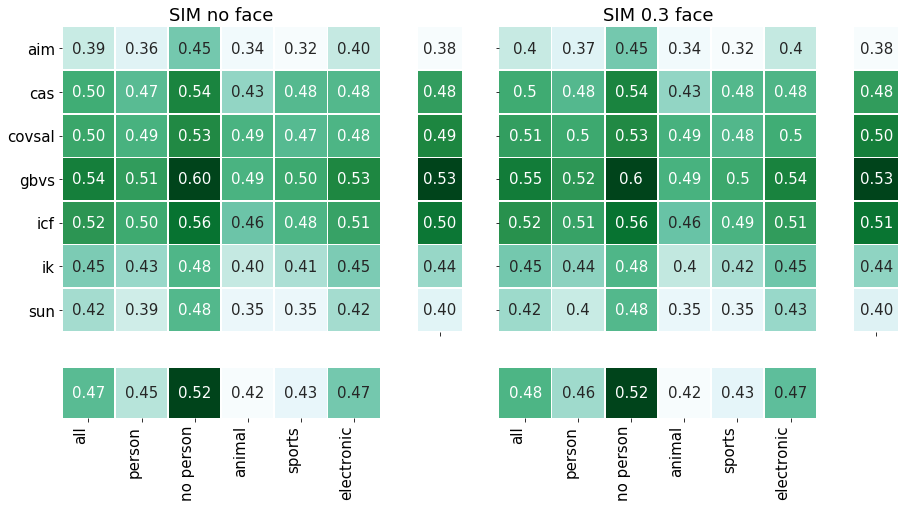

In [17]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(15,8))
gs = gridspec.GridSpec(2, 4,
                       width_ratios=[7, 1, 7, 1,],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[4])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[6])

fig.autofmt_xdate(rotation=45)
im = sns.heatmap(df0, annot=True, linewidths=.5, ax=ax01, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model, annot=True, linewidths=.5, ax=ax03, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context, annot=True, linewidths=.5, ax=ax02, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f03, annot=True, linewidths=.5, ax=ax11, cmap='BuGn', cbar=False, xticklabels='');
sns.heatmap(df0_mean_model_f03, annot=True, linewidths=.5, ax=ax13, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f03, annot=True, linewidths=.5, ax=ax12, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');


ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');


ax01.set_title('{} no face'.format(metric));
ax11.set_title('{} 0.3 face'.format(metric));
plt.savefig('../plots/'+'{}_sep_with_mean_1.jpg'.format(metric), bbox_inches='tight', pad_inches=0)

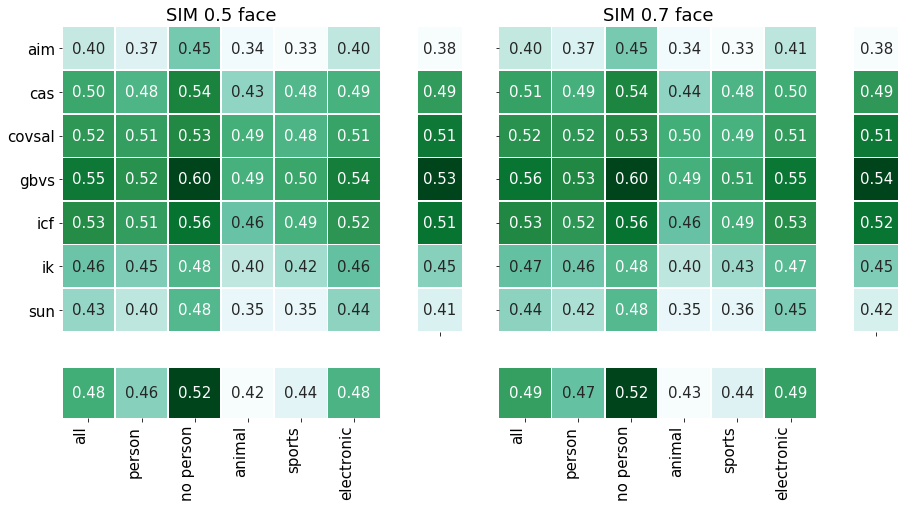

In [18]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(15,8))
gs = gridspec.GridSpec(2, 4,
                       width_ratios=[7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax21 = plt.subplot(gs[0])
ax22 = plt.subplot(gs[1])
ax23 = plt.subplot(gs[4])

ax31 = plt.subplot(gs[2])
ax32 = plt.subplot(gs[3])
ax33 = plt.subplot(gs[6])


fig.autofmt_xdate(rotation=45)

im = sns.heatmap(df0_f05, annot=True, linewidths=.5, ax=ax21, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f05, annot=True, linewidths=.5, ax=ax23, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f05, annot=True, linewidths=.5, ax=ax22, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f07, annot=True, linewidths=.5, ax=ax31, cmap='BuGn', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f07, annot=True, linewidths=.5, ax=ax33, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f07, annot=True, linewidths=.5, ax=ax32, cmap='BuGn', yticklabels='', cbar=False, fmt='.2f');

# ax21.yticks(rotate=90);
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax21.set_title('{} 0.5 face'.format(metric));
ax31.set_title('{} 0.7 face'.format(metric));


    
plt.savefig('../plots/'+'{}_sep_with_mean_2.jpg'.format(metric), bbox_inches='tight', pad_inches=0)
